In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import requests
from bs4 import BeautifulSoup
import seaborn as sns


Checkpoint 1: Data Cleaning 1

In [2]:
#Load the companies data
companyfile = "companies.txt"
companies = pd.read_csv(companyfile, sep = '\t', engine = 'python')

In [3]:
#load rounds data
rounds2file = "rounds2.csv"
rounds2 = pd.read_csv(rounds2file,encoding='ISO-8859-1')

In [4]:
#loading mapping data 
mapping = pd.read_csv("mapping.csv")

In [93]:
#replaced 0 with "na" in the sector names 
mapping['category_list'] = mapping['category_list'].fillna("").str.lower()
mapping['category_list']=mapping['category_list'].str.replace('0', 'na')

mapping.category_list = mapping.category_list.replace({"enterprise 2.na": "enterprise 2.0"})
# mapping[mapping['category_list'].str.contains("enterprise")]

In [6]:
#How many unique companies are present in rounds2?
uniqueRounds2Values = rounds2['company_permalink'].str.lower().unique()
uniqueRounds2Values.shape

(66370,)

In [7]:
uniqueCompaniesValues = companies['permalink'].str.lower().unique()
uniqueCompaniesValues.shape

(66368,)

In [8]:
#In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.
#permalink

In [9]:
#Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

In [10]:
exists_in_rounds2= rounds2[~rounds2['company_permalink'].str.lower().isin(companies['permalink'].str.lower())]

rounds2['company_permalink'].str.lower().isin(companies['permalink'].str.lower())

0          True
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
          ...  
114919     True
114920     True
114921     True
114922     True
114923     True
114924     True
114925     True
114926     True
114927     True
114928     True
114929     True
114930     True
114931     True
114932     True
114933     True
114934     True
114935     True
114936     True
114937     True
114938     True
114939     True
114940     True
114941     True
114942     True
114943     True
114944     True
114945     True
114946    False
114947    False
114948     True
Name: company_permalink,

In [11]:
exists_in_rounds2.shape
#yes 34

(34, 6)

In [12]:
#Merge the two data frames so that all variables (columns)
#in the companies frame are added to the rounds2 data frame.
#Name the merged frame master_frame. How many observations are present in master_frame?

In [13]:
companies['permalink'] = companies['permalink'].str.lower()
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()


In [14]:
#merged
master_frame = pd.merge(rounds2,companies , left_on='company_permalink', right_on='permalink')
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


Checkpoint 2: Funding Type Analysis

In [15]:
#Average funding amount of venture type
#seed type
#private_equity
#angel
pd.options.display.float_format = '{:.2f}'.format
funding_type_value = master_frame.groupby('funding_round_type').mean()
funding_type_value


,raised_amount_usd
funding_round_type,
angel,958891.77
convertible_note,1454402.19
debt_financing,17043526.02
equity_crowdfunding,538368.21
grant,4300576.34
non_equity_assistance,411203.05
post_ipo_debt,168704571.82
post_ipo_equity,82182493.87
private_equity,73308593.03


In [16]:
# Considering that Spark Funds wants to invest between 5 to 15 million USD per
# investment round, which investment type is the most suitable for them?
#1,50,00,000 spark 
#1,17,48,747.93 venture----
#9,58,891.77 angel
#7,33,08,593.03 private_equity
#720046.78 seed

Checkpoint 3: Country Analysis

In [17]:
#for each couhntry fetch highest investment for venture type

In [18]:
venture_type = master_frame[master_frame['funding_round_type'] == 'venture'].reset_index(drop=True)

In [19]:
len(venture_type['country_code'].unique())

104

In [20]:
unique_country = venture_type['country_code'].unique().tolist()

In [21]:
venture_groupby = venture_type.groupby('country_code').sum()

In [22]:
venture_groupby = venture_groupby.sort_values(by='raised_amount_usd',ascending=False)

In [23]:
venture_groupby

,raised_amount_usd
country_code,
USA,422510842796.00
CHN,39835418773.00
GBR,20245627416.00
IND,14391858718.00
CAN,9583332317.00
FRA,7259536732.00
ISR,6907514579.00
DEU,6346959822.00
JPN,3363676611.00


In [24]:
top9 = venture_groupby[:9]

In [25]:
top9

,raised_amount_usd
country_code,
USA,422510842796.00
CHN,39835418773.00
GBR,20245627416.00
IND,14391858718.00
CAN,9583332317.00
FRA,7259536732.00
ISR,6907514579.00
DEU,6346959822.00
JPN,3363676611.00


In [26]:
#fetch english speaking country list web scrapping
url = "https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language"
website_url = requests.get(url).text

In [27]:
soup = BeautifulSoup(website_url,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of territorial entities where English is an official language - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"XhrocApAMEwAAATXHpUAAAAN","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_territorial_entities_where_English_is_an_official_language","wgTitle":"List of territorial entities where English is an official language","wgCurRevisionId":935396332,"wgRevisionId":935396332,"wgArticleId":750096,"wgIsArticle":!0,

In [28]:
tables = soup.find_all("tbody")
tables

[<tbody><tr>
 <th>Nr
 </th>
 <th>Country
 </th>
 <th>Alpha-3 code
 </th>
 <th>Region
 </th>
 <th><a class="mw-redirect" href="/wiki/List_of_countries_by_population" title="List of countries by population">Population</a>
 </th>
 <th>Primary language?
 </th></tr>
 <tr>
 <td>1</td>
 <td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="640" data-file-width="1280" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/88/Flag_of_Australia_%28converted%29.svg/23px-Flag_of_Australia_%28converted%29.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/88/Flag_of_Australia_%28converted%29.svg/35px-Flag_of_Australia_%28converted%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/88/Flag_of_Australia_%28converted%29.svg/46px-Flag_of_Australia_%28converted%29.svg.png 2x" width="23"/> </span><a href="/wiki/Australia" title="Australia">Australia</a>
 </td>
 <td>AUS
 </td>
 <td>Oceania
 </td>
 <td align="right">25,019,600

In [29]:
countryTable1_links = tables[0].find_all("a")
countryTable1_links
countryTable2_links = tables[1].find_all("a")
countryTable2_links

[<a href="#endnote_population">1</a>,
 <a href="/wiki/Antigua_and_Barbuda" title="Antigua and Barbuda">Antigua and Barbuda</a>,
 <a href="#cite_note-CIAofficial-2">[2]</a>,
 <a href="/wiki/The_Bahamas" title="The Bahamas">Bahamas</a>,
 <a href="#cite_note-CIAofficial-2">[2]</a>,
 <a href="/wiki/Barbados" title="Barbados">Barbados</a>,
 <a href="#cite_note-3">[3]</a>,
 <a href="/wiki/Belize" title="Belize">Belize</a>,
 <a href="#cite_note-CIAusage-4">[4]</a>,
 <a href="/wiki/Botswana" title="Botswana">Botswana</a>,
 <a href="#cite_note-CIAusage-4">[4]</a>,
 <a href="/wiki/Burundi" title="Burundi">Burundi</a>,
 <a href="#cite_note-5">[5]</a>,
 <a href="/wiki/Cameroon" title="Cameroon">Cameroon</a>,
 <a href="#cite_note-CIAofficial-2">[2]</a>,
 <a href="/wiki/Canada" title="Canada">Canada</a>,
 <a href="#cite_note-CIAofficial-2">[2]</a>,
 <a href="/wiki/Quebec" title="Quebec">Quebec</a>,
 <a href="/wiki/New_Brunswick" title="New Brunswick">New Brunswick</a>,
 <a href="/wiki/Nunavut" title

In [30]:
Countries= []
for link in countryTable1_links:
    Countries.append(link.get('title'))
for link in countryTable2_links:
    Countries.append(link.get('title'))
print(Countries)

['List of countries by population', 'Australia', 'New Zealand', None, 'United Kingdom', 'United States', None, 'Antigua and Barbuda', None, 'The Bahamas', None, 'Barbados', None, 'Belize', None, 'Botswana', None, 'Burundi', None, 'Cameroon', None, 'Canada', None, 'Quebec', 'New Brunswick', 'Nunavut', 'Cook Islands', None, None, 'Dominica', None, 'Eswatini', None, 'Fiji', None, 'The Gambia', None, 'Ghana', None, 'Lingua franca', 'Grenada', None, 'Guyana', None, 'India', None, None, 'Republic of Ireland', None, None, 'Irish language', 'Jamaica', None, 'Kenya', None, 'Kiribati', None, 'Lesotho', None, 'Liberia', None, 'Malawi', None, 'Malta', None, 'Marshall Islands', None, 'Mauritius', None, 'Federated States of Micronesia', None, 'Namibia', None, 'Nauru', None, 'Nigeria', None, None, 'Lingua franca', 'Niue', None, None, 'Pakistan', None, 'Palau', None, 'Papua New Guinea', None, None, 'Philippines', None, None, 'Filipino language', 'Rwanda', None, 'Saint Kitts and Nevis', None, 'Saint Lu

In [31]:
country_wiki_list = pd.DataFrame()
country_wiki_list['english_speaking_countries'] = Countries
country_wiki_list = country_wiki_list.dropna().reset_index()
country_wiki_list

,index,english_speaking_countries
0,0,List of countries by population
1,1,Australia
2,2,New Zealand
3,4,United Kingdom
4,5,United States
5,7,Antigua and Barbuda
6,9,The Bahamas
7,11,Barbados
8,13,Belize
9,15,Botswana


In [32]:
#USA #GBR #INDIA

Checkpoint 4: Sector Analysis 1

In [33]:
#creating primary sector column in the master frame
master_frame['primary sector'] = master_frame['category_list'].fillna("").map(lambda x : x.split('|')[0])

In [34]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web


In [35]:
master_frame['primary sector'] = master_frame['primary sector'].str.lower()


In [36]:
def fetchMainSector(primary_sector):
    main_sector = ''
    
    row = mapping[mapping['category_list'] == primary_sector]
    if not row.empty:
        col= row.columns[row.isin([1]).any()]
        
        main_sector = col[0]
        
    return main_sector
    

In [37]:
#fetches main sector from mapping using the primary sector
master_frame['main_sector'] = master_frame['primary sector'].apply(fetchMainSector)

Checkpoint 5: Sector Analysis 2

In [38]:
Country1 = 'USA'
Country2 = 'GBR'
Country3 = 'IND'
FT = 'venture'
range_lower_limit= 5000000
range_upper_limit = 15000000


In [39]:
D1 = master_frame[(master_frame['country_code'] == Country1) & (master_frame['funding_round_type']== FT )
                  & (master_frame['raised_amount_usd'].between(range_lower_limit,range_upper_limit))].reset_index(drop=True)
D1['investment_count'] = D1['main_sector'].map(D1['main_sector'].value_counts())
D1['total_investment'] = D1['raised_amount_usd'].groupby(D1['main_sector']).transform('sum')
D1


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary sector,main_sector,investment_count,total_investment
0,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.00,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,"Social, Finance, Analytics, Advertising",2714,23807376964.00
1,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.00,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,apps,"News, Search and Messaging",1583,13971567428.00
2,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.00,/organization/128-technology,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,service providers,Others,2950,26321007002.00
3,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.00,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing,Manufacturing,799,7258553378.00
4,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.00,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing,Manufacturing,799,7258553378.00
5,/organization/1366-technologies,/funding-round/786f61aa9866f4471151285f5c56be36,venture,A,03-02-2010,5150000.00,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing,Manufacturing,799,7258553378.00
6,/organization/1366-technologies,/funding-round/82ace97530965cd2be8f262836b43ff5,venture,A,27-03-2008,12400000.00,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing,Manufacturing,799,7258553378.00
7,/organization/1366-technologies,/funding-round/ab99fc5a53717b1b53fd6aa5687c5fa9,venture,B,16-12-2010,6000000.00,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing,Manufacturing,799,7258553378.00
8,/organization/170-systems,/funding-round/b84bb882ca873f5fb96535671981196d,venture,A,16-04-2002,14000000.00,/organization/170-systems,170 Systems,http://www.170systems.com,Software,acquired,USA,MA,Boston,Bedford,01-01-1990,software,Others,2950,26321007002.00
9,/organization/17zuoye,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,A,01-01-2011,5000000.00,/organization/17zuoye,17zuoye,http://www.17zuoye.com/,Education|Language Learning,operating,USA,VA,VA - Other,Shanghai,01-01-2007,education,Others,2950,26321007002.00


In [40]:
D2 = master_frame[(master_frame['country_code'] == Country2) & (master_frame['funding_round_type']== FT )
                  & (master_frame['raised_amount_usd'].between(range_lower_limit,range_upper_limit))].reset_index(drop=True)
D2['investment_count'] = D2['main_sector'].map(D2['main_sector'].value_counts())
D2['total_investment'] = D2['raised_amount_usd'].groupby(D2['main_sector']).transform('sum')
D2


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary sector,main_sector,investment_count,total_investment
0,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,29-09-2014,5500000.00,/organization/365scores,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,android,"Social, Finance, Analytics, Advertising",133,1089404014.00
1,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,A,01-01-2008,8468328.00,/organization/7digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,content creators,Entertainment,56,482784687.00
2,/organization/7digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,NaN,19-10-2012,10000000.00,/organization/7digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,content creators,Entertainment,56,482784687.00
3,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,media,Entertainment,56,482784687.00
4,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,media,Entertainment,56,482784687.00
5,/organization/abcodia,/funding-round/3d20c23d203134ed86c0d1b2bec288b2,venture,B,18-05-2015,8259067.00,/organization/abcodia,Abcodia,http://abcodia.com,Biotechnology,operating,GBR,H9,London,London,01-01-2010,biotechnology,Cleantech / Semiconductors,130,1163990056.00
6,/organization/acacia-pharma,/funding-round/26eac8a3875e1a7bc68d36ceb7a71b05,venture,A,31-03-2011,10000000.00,/organization/acacia-pharma,Acacia Pharma,http://www.acaciapharma.com,Biotechnology,operating,GBR,C3,London,Cambridge,01-01-2006,biotechnology,Cleantech / Semiconductors,130,1163990056.00
7,/organization/acal-energy,/funding-round/16817efd4bbef10f63cccdf158f47a41,venture,NaN,15-06-2011,9910333.00,/organization/acal-energy,ACAL Energy,http://www.acalenergy.co.uk,Clean Technology,operating,GBR,C5,Runcorn,Runcorn,01-08-2004,clean technology,Cleantech / Semiconductors,130,1163990056.00
8,/organization/acal-enterprise-solutions,/funding-round/0f9a693d9686330c5c2724215e0048e2,venture,NaN,03-06-2014,10720178.00,/organization/acal-enterprise-solutions,Acal Enterprise Solutions,http://acalenterprisesolutions.com,Information Technology,operating,GBR,J8,Nottingham,Nottingham,01-01-1990,information technology,"Social, Finance, Analytics, Advertising",133,1089404014.00
9,/organization/accent-media-ltd,/funding-round/9dc643fa45031a46ffcfaa061d94e3e3,venture,NaN,01-07-2013,8300000.00,/organization/accent-media-ltd,Accent Media Limited,http://accent.media,Domains|Internet|Ticketing,operating,GBR,H9,London,London,21-02-2012,domains,"News, Search and Messaging",73,615746235.00


In [41]:
D3 = master_frame[(master_frame['country_code'] == Country3) & (master_frame['funding_round_type']== FT )
                  & (master_frame['raised_amount_usd'].between(range_lower_limit,range_upper_limit))].reset_index(drop=True)
D3['investment_count'] = D3['main_sector'].map(D3['main_sector'].value_counts())
D3['total_investment'] = D3['raised_amount_usd'].groupby(D3['main_sector']).transform('sum')
D3


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary sector,main_sector,investment_count,total_investment
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,media,Entertainment,33,280830000.00
1,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.00,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,e-commerce,Others,110,1013409507.00
2,/organization/a-little-world,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,B,09-09-2008,6410000.00,/organization/a-little-world,A LITTLE WORLD,http://alittleworld.com,Finance,operating,IND,16,Mumbai,Mumbai,02-03-2000,finance,"Social, Finance, Analytics, Advertising",60,550549550.00
3,/organization/adlabs-imagica,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,NaN,28-10-2014,8180000.00,/organization/adlabs-imagica,Adlabs Imagica,http://www.adlabsimagica.com,Entertainment|Tourism,operating,IND,16,IND - Other,Khopoli,NaN,entertainment,Entertainment,33,280830000.00
4,/organization/agile,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,A,01-05-2011,5740000.00,/organization/agile,Agile,http://www.agile-ft.com,Finance|Finance Technology|FinTech|Insurance,operating,IND,16,Mumbai,Mumbai,NaN,finance,"Social, Finance, Analytics, Advertising",60,550549550.00
5,/organization/akosha,/funding-round/908a8813e2273a2bc604bf40a45c15ff,venture,A,01-07-2014,5000000.00,/organization/akosha,Akosha,http://www.akosha.com,Consumer Internet|Digital Media|Enterprise Sof...,operating,IND,7,New Delhi,New Delhi,01-06-2010,consumer internet,"Social, Finance, Analytics, Advertising",60,550549550.00
6,/organization/amagi-media-labs,/funding-round/f244a91cc714317f6fbbc80dcc1d5135,venture,A,17-06-2013,5500000.00,/organization/amagi-media-labs,Amagi Media Labs,http://amagi.com,Advertising,operating,IND,19,Bangalore,Bangalore,01-01-2008,advertising,"Social, Finance, Analytics, Advertising",60,550549550.00
7,/organization/ameyo,/funding-round/81b50a403d5d2293715fe9b0ce4db5d3,venture,A,03-07-2015,5000000.00,/organization/ameyo,Ameyo,http://www.ameyo.com/,Software,operating,IND,10,New Delhi,Gurgaon,01-01-2003,software,Others,110,1013409507.00
8,/organization/ani-technologies,/funding-round/1e2b54335e2a41d8d7db25b7c11db399,venture,A,10-04-2012,5000000.00,/organization/ani-technologies,Ola,http://www.olacabs.com,Automotive|E-Commerce|Internet|Mobile|Mobile C...,operating,IND,28,Kolkata,Kolkata,03-12-2010,automotive,Automotive & Sports,13,136900000.00
9,/organization/annapurna-microfinace,/funding-round/3f03bc9fea4ae59b1ce8c86a0782107e,venture,B,26-03-2014,5000000.00,/organization/annapurna-microfinace,Annapurna Microfinace,http://ampl.net.in,Finance,operating,IND,21,Bhubaneswar,Bhubaneswar,01-01-2009,finance,"Social, Finance, Analytics, Advertising",60,550549550.00


In [42]:
#1 Total number of investments (count) country 1
print(D1.raised_amount_usd.count())


12150


In [43]:
#1 Total number of investments (count) country 2
print(D2.raised_amount_usd.count())


628


In [44]:
#1 Total number of investments (count) country 3
print(D3.raised_amount_usd.count())


330


In [45]:
#################################################################

In [46]:
#2. Total amount of investment (USD) country 1
# print(D1['total_investment'].groupby(D1['main_sector']).sum())
D1['raised_amount_usd'].sum()


108531347515.0

In [47]:
#2. Total amount of investment (USD) country 2
D2['raised_amount_usd'].sum()


5436843539.0

In [48]:
#2. Total amount of investment (USD) country 3
D3['raised_amount_usd'].sum()

2976543602.0

In [49]:
#################################################################

In [50]:
#3. Top sector (based on count of investments) country 1
first_best_sector_D1 = D1.loc[D1['investment_count'].idxmax()]
print(first_best_sector_D1['main_sector'])


Others


In [51]:
# print(D2.Count_Column.value_counts().unique())
#3. Top sector (based on count of investments) country 2
print(D2.loc[D2['investment_count'].idxmax()]['main_sector'])

Others


In [52]:
#3. Top sector (based on count of investments) country 3
print(D3.loc[D3['investment_count'].idxmax()]['main_sector'])

Others


In [53]:
###########################################################################################

In [54]:
#4 Second-best sector (based on count of investments) country 1
investment_count_D1 = D1.investment_count.value_counts().unique()
print(investment_count_D1)
second_best_sector_D1 = D1[D1['investment_count']==investment_count_D1[1]]
second_best_sector_D1.groupby('main_sector').first().index
# second_best_sector_D1

[2950 2714 2350 1583  909  799  591  167   86    1]


Index(['Social, Finance, Analytics, Advertising'], dtype='object', name='main_sector')

In [55]:
#4 Second-best sector (based on count of investments) country 2
investment_count_D2 = D2.investment_count.value_counts().unique()
print(investment_count_D2)
second_best_sector_D2 = D2[D2['investment_count']==investment_count_D2[1]]
print(second_best_sector_D2.groupby('main_sector').first().index)

[147 133 130  73  56  42  24  16   7]
Index(['Social, Finance, Analytics, Advertising'], dtype='object', name='main_sector')


In [56]:
#4 Second-best sector (based on count of investments) country 3
investment_count_D3 = D3.investment_count.value_counts().unique()
print(investment_count_D3)
second_best_sector_D3 = D3[D3['investment_count']==investment_count_D3[1]]
print(second_best_sector_D3.groupby('main_sector').first().index)

[110  60  52  33  21  20  19  13   2]
Index(['Social, Finance, Analytics, Advertising'], dtype='object', name='main_sector')


In [57]:
###########################################################################################

In [58]:
#5 third best sector country 1
print(investment_count_D1[2])
third_best_sector_D1 = D1[D1['investment_count']==investment_count_D1[2]]
print(third_best_sector_D1.groupby('main_sector').first().index)


2350
Index(['Cleantech / Semiconductors'], dtype='object', name='main_sector')


In [59]:
#5 third best sector country 2
print(investment_count_D2[2])
third_best_sector_D2 = D2[D2['investment_count']==investment_count_D2[2]]
print(third_best_sector_D2.groupby('main_sector').first().index)




130
Index(['Cleantech / Semiconductors'], dtype='object', name='main_sector')


In [60]:
#5 third best sector country 3
print(investment_count_D3[2])
third_best_sector_D3 = D3[D3['investment_count']==investment_count_D3[2]]
print(third_best_sector_D3.groupby('main_sector').first().index)

52
Index(['News, Search and Messaging'], dtype='object', name='main_sector')


In [61]:
###########################################################################################

In [62]:
#6. Number of investments in the top sector (refer to point 3) country 1
investment_in_top_sector_D1 = D1[D1['main_sector']=="Others"]
investment_in_top_sector_D1['investment_count'].iloc[0]

2950

In [63]:
#6. Number of investments in the top sector (refer to point 3) country 2
investment_in_top_sector_D2 = D2[D2['main_sector']=="Others"]
investment_in_top_sector_D2['investment_count'].iloc[0]

147

In [64]:
 #6. Number of investments in the top sector (refer to point 3) country 3
investment_in_top_sector_D3 = D3[D3['main_sector']=="Others"]
investment_in_top_sector_D3['investment_count'].iloc[0]

110

In [65]:
###########################################################################################

In [66]:
#7 Number of investments in second sector (4) country 1
investment_in_second_top_sector_D1 = D1[D1['main_sector']=="Social, Finance, Analytics, Advertising"]
investment_in_second_top_sector_D1['investment_count'].iloc[0]

2714

In [67]:
#7 Number of investments in second sector (4) country 2
investment_in_second_top_sector_D2 = D2[D2['main_sector']=="Social, Finance, Analytics, Advertising"]
investment_in_second_top_sector_D2['raised_amount_usd'].count()

133

In [68]:
#7 Number of investments in second sector (4) country 3
investment_in_second_top_sector_D3 = D3[D3['main_sector']=="Social, Finance, Analytics, Advertising"]
investment_in_second_top_sector_D3['raised_amount_usd'].count()

60

In [69]:
###########################################################################################

In [70]:
#8 Number of investments in third sector (5) country 1
investment_in_third_top_sector_D1 = D1[D1['main_sector']=="Cleantech / Semiconductors"]
investment_in_third_top_sector_D1['raised_amount_usd'].count()

2350

In [71]:
#8 Number of investments in third sector (5) country 2
investment_in_third_top_sector_D2 = D2[D2['main_sector']=="Cleantech / Semiconductors"]
investment_in_third_top_sector_D2['raised_amount_usd'].count()

130

In [72]:
#8 Number of investments in third sector (5) country 3
investment_in_third_top_sector_D3 = D3[D3['main_sector']=="News, Search and Messaging"]
investment_in_third_top_sector_D3['raised_amount_usd'].count()

52

In [73]:
###########################################################################################

In [74]:
#9. For the top sector count-wise (point 3), which company received the highest investment? country 1
highest_investment_company_D1 = investment_in_top_sector_D1['raised_amount_usd'].groupby(investment_in_top_sector_D1['company_permalink']).sum().sort_values(ascending=False)
D1[D1['permalink']== highest_investment_company_D1.index[0]]['name'].unique()
#have to consider others

array(['Virtustream'], dtype=object)

In [75]:
#9. For the top sector count-wise (point 3), which company received the highest investment? country 2
highest_investment_company_D2 = investment_in_top_sector_D2['raised_amount_usd'].groupby(investment_in_top_sector_D2['company_permalink']).sum().sort_values(ascending=False)
D2[D2['permalink']==highest_investment_company_D2.index[0]]['name'].unique()

array(['Electric Cloud'], dtype=object)

In [76]:
#9. For the top sector count-wise (point 3), which company received the highest investment? country 3
highest_investment_company_D3 = investment_in_top_sector_D3['raised_amount_usd'].groupby(investment_in_top_sector_D3['company_permalink']).sum().sort_values(ascending=False)
D3[D3['permalink']==highest_investment_company_D3.index[0]]['name'].unique()

array(['FirstCry.com'], dtype=object)

In [77]:
###########################################################################################

In [78]:
#10. For the second-best sector count-wise (point 4), which company received the highest investment? country 1
second_highest_investment_company_D1 = investment_in_second_top_sector_D1['raised_amount_usd'].groupby(investment_in_second_top_sector_D1['company_permalink']).sum().sort_values(ascending=False)
D1[D1['permalink']==second_highest_investment_company_D1.index[0]]['name'].unique()

array(['SST Inc. (Formerly ShotSpotter)'], dtype=object)

In [79]:
#10. For the second-best sector count-wise (point 4), which company received the highest investment? country 2
second_highest_investment_company_D2 = investment_in_second_top_sector_D2['raised_amount_usd'].groupby(investment_in_second_top_sector_D2['company_permalink']).sum().sort_values(ascending=False)
D2[D2['permalink']==second_highest_investment_company_D2.index[0]]['name'].unique()

array(['Celltick Technologies'], dtype=object)

In [80]:
#10. For the second-best sector count-wise (point 4), which company received the highest investment? country 3
second_highest_investment_company_D3 = investment_in_second_top_sector_D3['raised_amount_usd'].groupby(investment_in_second_top_sector_D3['company_permalink']).sum().sort_values(ascending=False)
D3[D3['permalink']==second_highest_investment_company_D3.index[0]]['name'].unique()

array(['Manthan Systems'], dtype=object)

Charts

In [81]:

funding_type_value['FT'] = funding_type_value.index

FT_labels_list = ['venture', 'seed', 'angel', 'private_equity']
FT_labels = funding_type_value[funding_type_value['FT'].isin(FT_labels_list)]['FT'].tolist()
mean_amount_FT= funding_type_value[funding_type_value['FT'].isin(FT_labels_list)]['raised_amount_usd'].round(2).tolist()
print(FT_labels)
print(mean_amount_FT)

['angel', 'private_equity', 'seed', 'venture']
[958891.77, 73308593.03, 720046.78, 11748747.93]


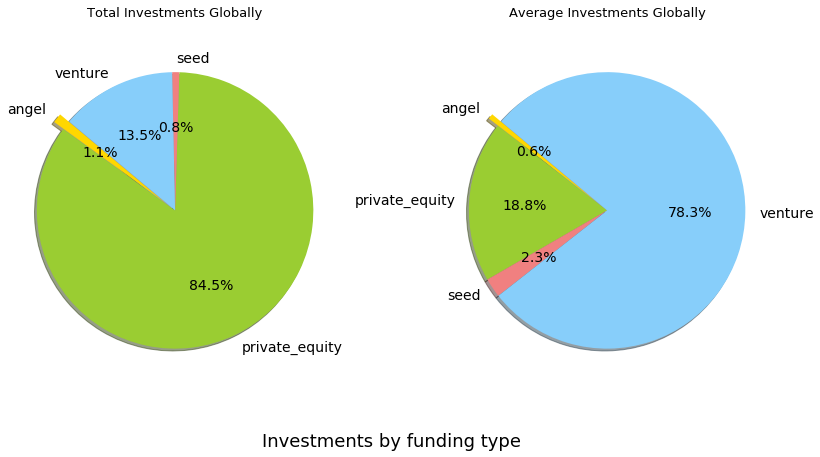

In [82]:
# A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity,
# and the average amount of investment in each funding type. 
# This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

total_investment_FT = master_frame.groupby('funding_round_type').sum()
total_investment_FT['FT'] = total_investment_FT.index

FT_labels_total_investment = total_investment_FT[total_investment_FT['FT'].isin(FT_labels_list)]['FT'].tolist()
sum_amount_FT= total_investment_FT[total_investment_FT['FT'].isin(FT_labels_list)]['raised_amount_usd'].round(2).tolist()


fig = plt.figure()

ax1 = fig.add_axes([0, 0, 1, 1], aspect=0.5)
# Data to plot
labels = FT_labels
sizes = mean_amount_FT
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, radius = 1.2,
autopct='%1.1f%%', shadow=True, startangle=140,textprops={'fontsize': 14})

# ax1.axis('equal')






ax2 = fig.add_axes([1, 0, 1, 1], aspect=0.5)
labels = FT_labels_total_investment
sizes = sum_amount_FT
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
ax2.pie(sizes, explode=explode, labels=labels, colors=colors,radius = 1.2,
autopct='%1.1f%%', shadow=True, startangle=140,textprops={'fontsize': 14})
ax1.set_title('Total Investments Globally',pad=50,fontsize=13)
ax2.set_title('Average Investments Globally',pad=50,fontsize=13)
# ax2.axis('equal')
fig.suptitle("Investments by funding type",fontsize=18, va='center', x=1,y=-0.3)

plt.show()

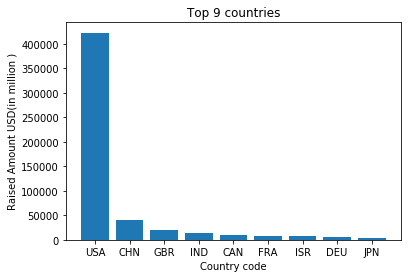

In [83]:
# A plot showing the top 9 countries against the total amount of investments of funding type FT.
# This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.


import numpy as np
objects = top9.index
y_pos = np.arange(len(objects))
performance = top9['raised_amount_usd'].map(lambda x: x/1000000)

plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Raised Amount USD(in million )')
plt.title('Top 9 countries')
plt.xlabel("Country code")
plt.show()


In [84]:
# A plot showing the number of investments in the top 3 sectors of the top 3 countries
# on one chart (for the chosen investment type FT). 



In [85]:
country1_top_3_sectors = D1.drop_duplicates(subset='main_sector', keep='first').sort_values(by='investment_count', ascending=False).reset_index()
country1_top_3_sectors = country1_top_3_sectors[:3]
country1_top_3_sectors

,index,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,...,status,country_code,state_code,region,city,founded_at,primary sector,main_sector,investment_count,total_investment
0,2,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.00,/organization/128-technology,128 Technology,http://www.128technology.com/,...,operating,USA,MA,Boston,Burlington,07-07-2014,service providers,Others,2950,26321007002.00
1,0,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.00,/organization/0xdata,H2O.ai,http://h2o.ai/,...,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,"Social, Finance, Analytics, Advertising",2714,23807376964.00
2,11,/organization/1bog,/funding-round/3d2463c9b97f32b3be8747fbd629961f,venture,A,11-02-2010,5000000.00,/organization/1bog,One Block Off the Grid (1BOG),http://1bog.org,...,closed,USA,CA,SF Bay Area,San Francisco,01-11-2008,clean technology,Cleantech / Semiconductors,2350,21633430822.00


In [86]:
country2_top_3_sectors = D2.drop_duplicates(subset='main_sector', keep='first').sort_values(by='investment_count', ascending=False).reset_index()
country2_top_3_sectors = country2_top_3_sectors[:3]


In [87]:
country3_top_3_sectors = D3.drop_duplicates(subset='main_sector', keep='first').sort_values(by='investment_count', ascending=False).reset_index()
country3_top_3_sectors = country3_top_3_sectors[:3]


In [88]:
top_country_top_3_sectors = pd.concat([country1_top_3_sectors,country2_top_3_sectors,country3_top_3_sectors])


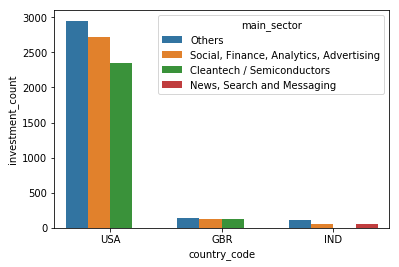

In [89]:
sns.barplot(data=top_country_top_3_sectors, x='country_code',y='investment_count', hue='main_sector')